In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/__results__.html
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/__notebook__.ipynb
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/__output__.json
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/custom.css
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/__results___files/__results___80_0.png
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/__results___files/__results___72_0.png
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/__results___files/__results___60_0.png
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/__results___files/__results___70_1.png
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/__results___files/__results___45_0.png
/kaggle/input/masterclass-1-a-comprehensive-guide-for-eda/__results___files/__results___56_0.png
/kaggle/input/ma

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

# Basic exploration
print(df.head())
print(df.info())
print(df.describe())
print(f"Dataset shape: {df.shape}")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

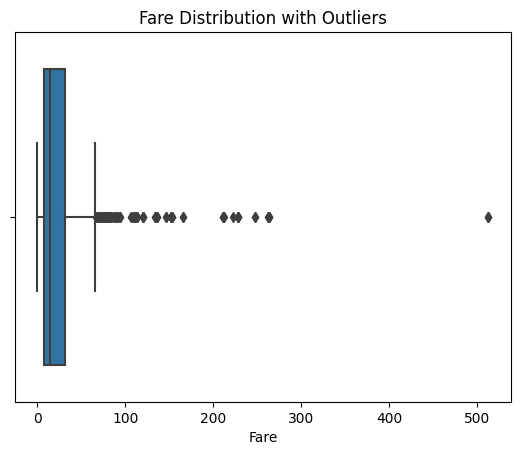

In [5]:
# Boxplot to detect outliers
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution with Outliers")
plt.show()

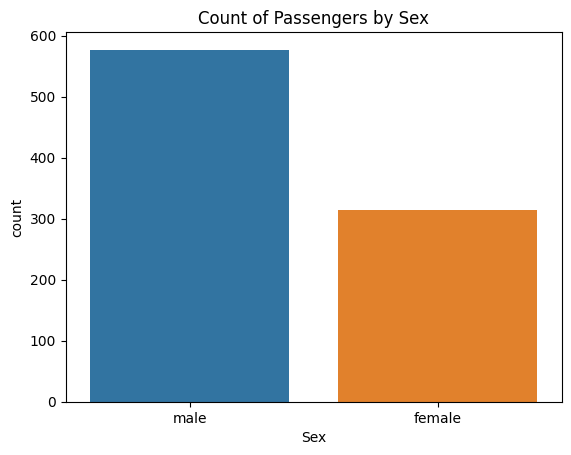

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


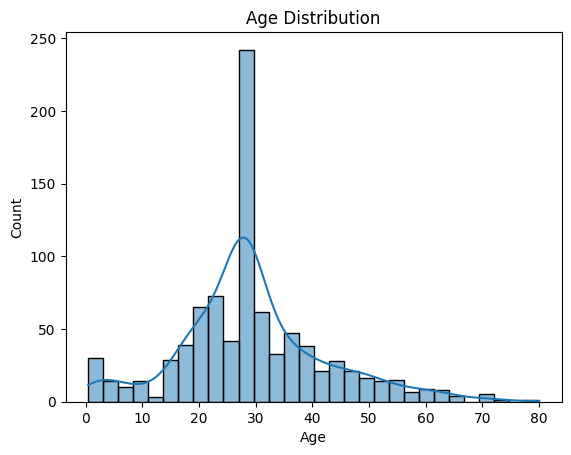

In [6]:
# Categorical feature: Sex
sns.countplot(x='Sex', data=df)
plt.title("Count of Passengers by Sex")
plt.show()

# Continuous feature: Age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

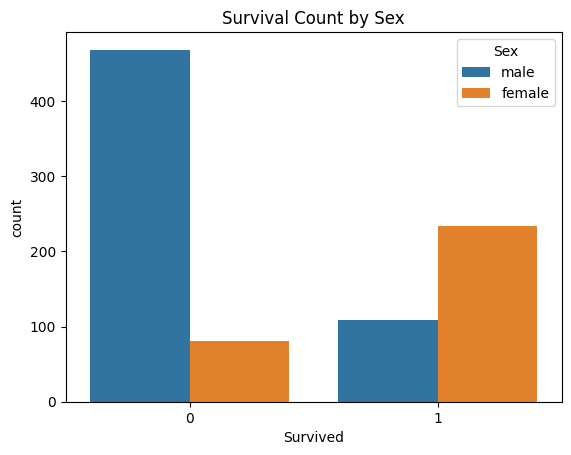

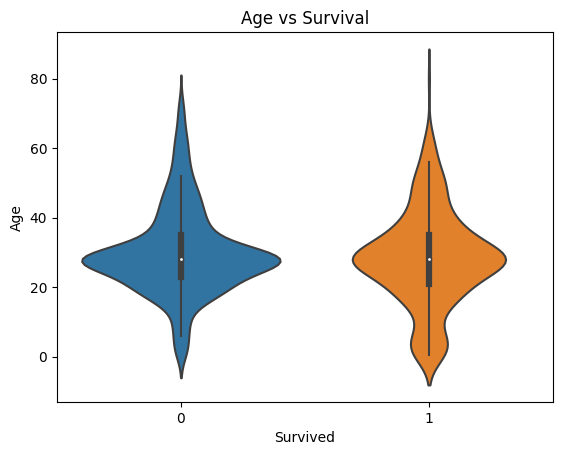

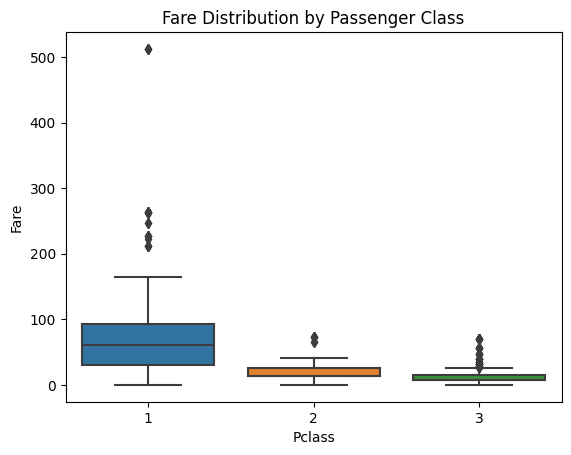

In [7]:
# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Sex")
plt.show()

# Age distribution by survival
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

# Fare vs Pclass
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Passenger Class")
plt.show()

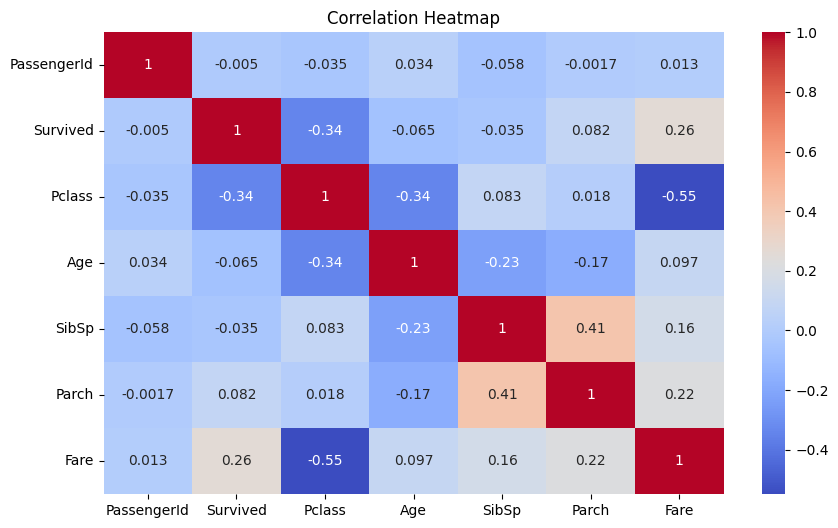

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


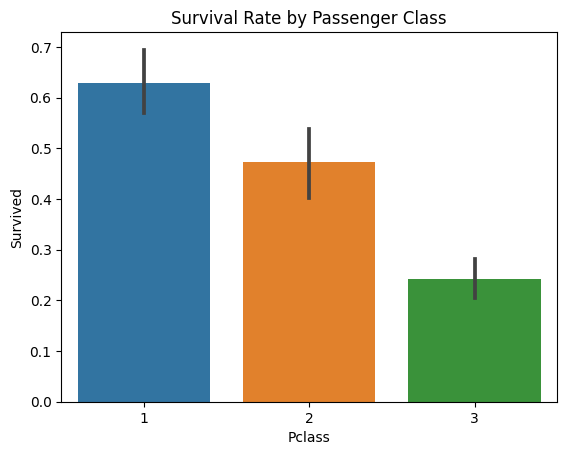

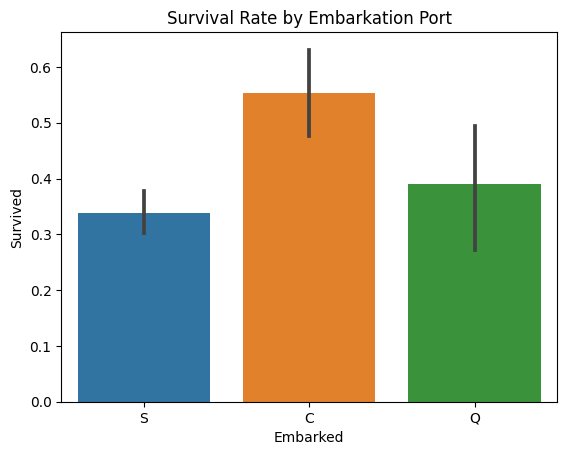

In [9]:
# Survival rate by class
print(df.groupby('Pclass')['Survived'].mean())

# Visualize
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarkation Port")
plt.show()